In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

In [34]:
df = pd.read_csv('Banking Dataset.csv')

In [35]:
df.head()

,Cust_ID,Target,Age,Gender,Balance,Occupation,No_OF_CR_TXNS,AGE_BKT,SCR,Holding_Period
0,C1,0,30,M,160378.60,SAL,2,26-30,826,9
1,C10,1,41,M,84370.59,SELF-EMP,14,41-45,843,9
2,C100,0,49,F,60849.26,PROF,49,46-50,328,26
3,C1000,0,49,M,10558.81,SAL,23,46-50,619,19
4,C10000,0,43,M,97100.48,SENP,3,41-45,397,8


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Cust_ID         20000 non-null  object 
 1   Target          20000 non-null  int64  
 2   Age             20000 non-null  int64  
 3   Gender          20000 non-null  object 
 4   Balance         20000 non-null  float64
 5   Occupation      20000 non-null  object 
 6   No_OF_CR_TXNS   20000 non-null  int64  
 7   AGE_BKT         20000 non-null  object 
 8   SCR             20000 non-null  int64  
 9   Holding_Period  20000 non-null  int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 1.5+ MB


In [37]:
df.describe()

,Target,Age,Balance,No_OF_CR_TXNS,SCR,Holding_Period
count,20000.000000,20000.000000,2.000000e+04,20000.000000,20000.000000,20000.000000
mean,0.086650,38.396200,1.461813e+05,16.653050,557.136050,15.344100
std,0.281329,9.600179,1.698125e+05,12.977704,260.521453,8.952128
min,0.000000,21.000000,0.000000e+00,0.000000,100.000000,1.000000
25%,0.000000,30.000000,2.373692e+04,7.000000,333.000000,8.000000
50%,0.000000,38.000000,7.975574e+04,13.000000,560.000000,16.000000
75%,0.000000,47.000000,2.173106e+05,22.000000,784.000000,23.000000
max,1.000000,55.000000,1.246967e+06,50.000000,999.000000,31.000000


In [38]:
df.shape

(20000, 10)

In [39]:
for feature in df.columns:
    if df[feature].dtype == 'object':
        df[feature] = pd.Categorical(df[feature]).codes

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Cust_ID         20000 non-null  int16  
 1   Target          20000 non-null  int64  
 2   Age             20000 non-null  int64  
 3   Gender          20000 non-null  int8   
 4   Balance         20000 non-null  float64
 5   Occupation      20000 non-null  int8   
 6   No_OF_CR_TXNS   20000 non-null  int64  
 7   AGE_BKT         20000 non-null  int8   
 8   SCR             20000 non-null  int64  
 9   Holding_Period  20000 non-null  int64  
dtypes: float64(1), int16(1), int64(5), int8(3)
memory usage: 1.0 MB


In [41]:
x = df.drop(['Target', 'Cust_ID'], axis=1)
y = df.pop('Target')

In [42]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=30, random_state=1)

In [43]:
rfcl = RandomForestClassifier(n_estimators=501, 
                              oob_score=True, 
                              max_depth=10, 
                              max_features=5,
                              min_samples_leaf=50,
                              min_samples_split=110)

In [44]:
rfcl = rfcl.fit(x_train, y_train) # build model

In [45]:
# OOB Score
rfcl.oob_score_

0.9163244867300951

In [47]:
from sklearn.model_selection import GridSearchCV # Identifies the values that will give best OOB score

In [48]:
param_grid = {
    'max_depth': [7, 10],
    'max_features': [4, 6],
    'min_samples_leaf': [50, 100],
    'min_samples_split': [150, 300],
    'n_estimators': [301, 501]
}

In [49]:
rfcl = RandomForestClassifier()

In [50]:
grid_search = GridSearchCV(estimator = rfcl, param_grid=param_grid, cv=3) # cross validation cv

In [51]:
grid_search.fit(x_train, y_train) # make model

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [7, 10], 'max_features': [4, 6],
                         'min_samples_leaf': [50, 100],
                         'min_samples_split': [150, 300],
                         'n_estimators': [301, 501]})

In [52]:
grid_search.best_params_

{'max_depth': 10,
 'max_features': 6,
 'min_samples_leaf': 50,
 'min_samples_split': 150,
 'n_estimators': 501}

In [53]:
best_grid = grid_search.best_estimator_

In [55]:
ytrain_predict = best_grid.predict(x_train)
ytest_predict = best_grid.predict(x_test)

In [56]:
from sklearn.metrics import confusion_matrix, classification_report

In [57]:
confusion_matrix(y_train, ytrain_predict)

array([[18177,    61],
       [ 1606,   126]], dtype=int64)

In [58]:
confusion_matrix(y_test, ytest_predict)

array([[29,  0],
       [ 1,  0]], dtype=int64)

In [59]:
import matplotlib.pyplot as plt

In [60]:
probs = best_grid.predict_proba(x_train)

In [61]:
probs = probs[:, 1]

In [63]:
from sklearn.metrics import roc_auc_score

In [64]:
auc = roc_auc_score(y_train, probs)

In [65]:
auc

0.8463847720934922

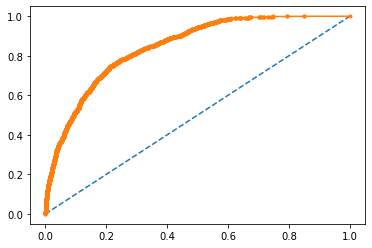

In [67]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0,1], linestyle = '--')
plt.plot(fpr, tpr, marker='.')
plt.show()

0.5517241379310345


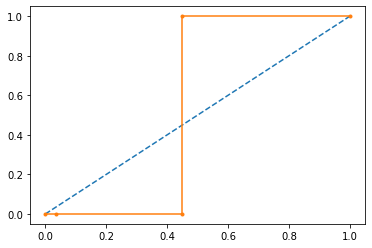

In [77]:
from sklearn.metrics import roc_curve
probs = best_grid.predict_proba(x_test)
probs = probs[:, 1]
auc = roc_auc_score(y_test, probs)
print(auc)
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0,1], linestyle = '--')
plt.plot(fpr, tpr, marker='.')
plt.show()